<a href="https://colab.research.google.com/github/BenUCL/AI4Reefs-Workshop/blob/main/Colab_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Viewing this on Github? Click 'Open in Colab' to start!

# **Colab notebook**

# **Part 1: Introduction to Colab**

Learn the basics of Google Colaboratory, including:


1. How to create and save your own notebooks
2. How to run some simple code
3. How to install and import packages
4. How to upload your own data
5. How to connect and access data in your Google Drive account
6. How to access Colabs free GPU feature
7. Saving outputs




# 1. How to create and save your own notebooks

This notebook shared with  has is a frozen copy which will not be saved once you exit.

Its best to create your own copy. To do this, go to 'File' -> 'Save a copy in Drive'.

This will open a new notebook called 'Copy of colab_intro.ipynb' which has automatically been saved to your Google Drive. This should be the version you edit from here on. You can go to your Google Drive and move this to an appropriate folder if you wish.

You can also click on the name and remove the 'Copy of' prefix.

# 2. How to run some simple code

Click on this cell then hit the '+ Code' button to add a new code cell below.

Copy in: 'print("I am coding in Colab")' and hit the run button. The output will appear below.

In [ ]:
print("I am coding in Colab")

I am coding in Colab


You can also use the shift + enter shortcut to run code cells.

Now we'll run some other simple code examples. Some cells will print an output below your cell, others won't, can you see why this is?

In [ ]:
a = 10
a

10

In [ ]:
b = 5

In [ ]:
b

5

In [ ]:
c = b*a

In [ ]:
print(c)

50


# 3. How to install and import packages

You will almost always need to work with packages. Colab comes with many of the most common packages preinstalled which saves you the time needed to install these.

To import a package which has been installed you simply need to run a code cell with 'import yourpackage', often with an abbreviated name using 'as', for example:

In [ ]:
# scikit-learn a.k.a 'sklearn' is arguably the best machine learning package you can use to get started

import sklearn

# Other packages you will almost always want:
import numpy as np # for doing maths faster
import pandas as pd # for working with data frames/data tables

## 4. How to upload data

To begin working with your own data one option is to upload it to colab.

Download the example coral reef data csv from the workshop_files folder. Use the file option on the left sidebar and see if you can upload the example_data csv here.

Once this has been added, hover over it and select the three dots. Copy the filepath and add that between the quotes '' below:


In [ ]:
# Load the csv into a pandas dataframe
df = pd.read_csv('')

# View the first 5 rows:
df.head()

## 5. How to connect and access data in your Google Drive account

Downloading datasets and packages to a Colab instance can be useful for small files as its quick and easy. However, your Colab instance will be lost after a period of inactivity (approx. 90min). As long as you hit save, your code and its ouputs will be viewable in the notebook. However, all variables, packages and data stored in memory will be lost - you'll have to upload and run all this again from the start when reconnecting.

Uploading larger datasets is often the most time consuming process when reconnecting. A better option for getting started is to access data stored on your GDrive account. This removes the need to upload new data.

To do this, we first need to connect your GDrive account to this Colab instance. You can use the following code, or the 'Mount Drive' option inside the 'Files' tab.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[link text](https:// [link text](https://))You should now see the 'drive' folder added in your 'Files' tab.

Next up, we need to place some data in your GDrive. This can be done by uploading it yourself. You can then access the file path and use this as we did above.

However, on this occasion we'll use another option which is linking to a publically available folder in another GDrive. The one we'll be using is a dataset of 152 one-minute soundscape recordings from coral reefs used in the publication: https://doi.org/10.1016/j.ecolind.2022.108986

This dataset is  stored in the public GDrive folder: https://drive.google.com/drive/folders/1Chs_Y9nt4XBy28ZWAK3TPzyNhT3E26O1?usp=share_link

Open this link and select the 'Add shortcut to Drive' option. This should now be available in your 'drive' folder in the 'Files' tab of Colab.

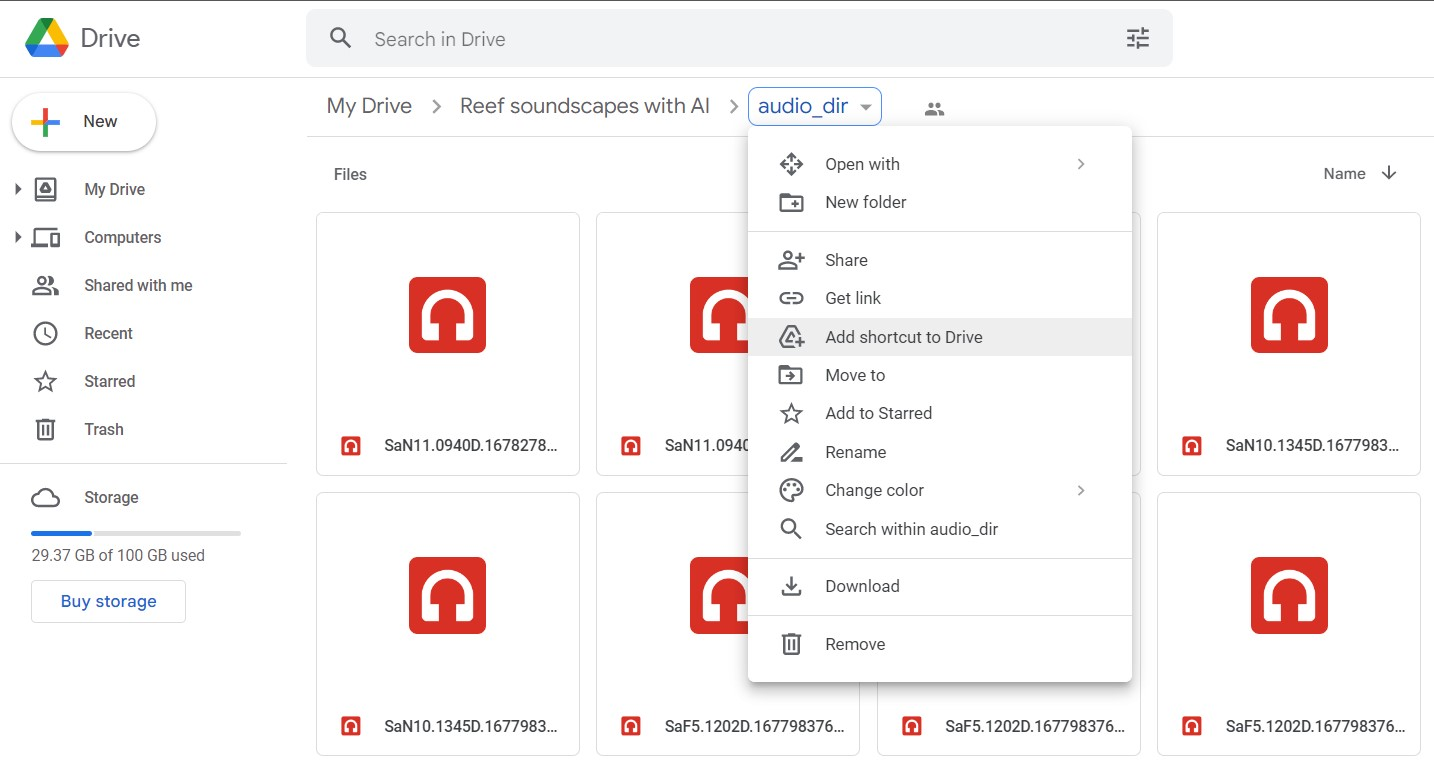


We can listen to these files in Colab. Copy the path of one of these files below and have a listen (note these particular recordings are quiet so headphones may be needed to hear them clearly).

In [ ]:
from IPython.display import Audio
# Path to your audio file
audio_file = 'COPY PATH HERE'

wn = Audio(audio_file, autoplay=True)
display(wn)

We can also plot a spectrogram of this audio

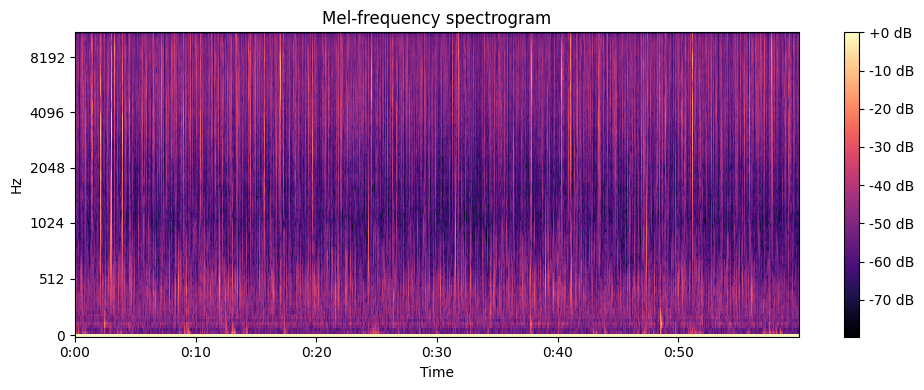

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the audio file
y, sr = librosa.load(audio_file)

# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plotting
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

Any kind of plot you would expect to be able to create in a normal Python or R environment can be produced in Colab notebooks.

## 6. How to access Colabs free GPU feature

An added bonus of using Google Colab is that you can get free access (with limits) to a 'graphical processing unit' (GPU) for accelerated processing - pretty much essential for deep learning. You can read more about the limits under the 'Resource Limits' heading here: https://research.google.com/colaboratory/faq.html

First lets see if you have a GPU enabled, this should currently be false:

In [ ]:
import torch

torch.cuda.is_available()

False

To access a GPU you must change your runtime type. This can be done by selecting 'Runtime' -> 'Change runtime type' -> 'Hardware accelerator' -> 'GPU'.

This will delete your current instance and restart a new one on a GPU so be sure to do this before you install any packages and download data (you will see that your GDrive and data folders we added are now gone).

Now, you've changed runtime type to a GPU rerun the above code cell to see if it now returns True. Occasionally you may not be allocated a GPU, especially if you have made heavy use of this feature recently.

We can mock up a quick matrix multiplication task to compare the execution speed of a GPU compared to CPU:

In [ ]:
import time

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set dummy input data
input_data = torch.randn(10000, 10000).to(device)

# Time matrix multiplication
start_time = time.time()
output = input_data.matmul(input_data)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Make a note of the elapsed time. Now change your runtime back to a CPU by selecting 'None' and rerun the above code cell to see how long a CPU takes.

You will likely get different execution speeds to some peers when using a GPU, can you find out why online?

## 7. Saving your outputs

Saving your work is easy. You can save a copy of this notebook in your GDrive using 'File' -> 'Save a copy in Drive', or, if you use GitHub you can use 'File' -> 'Save a copy in Github' - be sure to create an appropriate repository on your GitHub account where this can be saved.

If you wrote any outputs to a file these will be saved in the 'Files' tab and can be downloaded from here - be sure to do this if you are quitting a session or taking an extended break as any files will be deleted when your runtime disconnects. If you saved these to a folder in your GDrive they will automatically be saved there.

## Conclusion

This notebook has given you a quick crash course in using Colab. We recommend colab and Google Drive as an excellent tool for starting your own projects with python and machine learning.

If you have some extra time, have a search online and see if you can find out more about when you may want to use Google Colab and when you may have to use other programming environments.

There are a huge number of existing Colab notebooks out there which you can look through, try out and adapt code from, here are some examples:
- Generate images from text prompts using Stable Diffusion: https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb
- Sound classification with YAMNet:
https://www.tensorflow.org/hub/tutorials/yamnet
- Object detection from images with YOLO:
https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb




# **Colab notebook**

# **Part 2: Your first ML project**

1. Open up the example_coral_reef_data file in excel and take a look at the data
2. Now upload it and run the code below
3. You have now trained a random forest supervised machine learning classiifer on this data!

In [ ]:
# Import some packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [ ]:
# Read the dataset
df = pd.read_csv('COPY PATH HERE')

# Set the random seed
random_seed = 0

# Prepare the data for training the model
X = df.drop('class_label', axis=1)

# 'One-hot' encode the 'reef_type' categorical feature
features = pd.get_dummies(X, columns=['reef_type'])

# Create a labels list from the 'class_label' column. 0 = unbleched, 1 = bleached.
labels = df['class_label']

# Split the dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.5, random_state=random_seed)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=random_seed)

# Train the classifier
model.fit(train_features, train_labels)

# Predict on the test set
test_predictions = model.predict(test_features)

# Calculate the accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(conf_matrix).plot(values_format='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy}')

## Questions
1. What is the plot showing us?
2. What happens if you increase the test data proportion?
3. If we change the random_seed, what will this change about the data the model is trained on, and the model itself?
4. What is the n_estimators argument? What happens if you increase or decrease this?
5. HARD: Another popular aglorithm are Support Vector Machines (SVM). Create a new cell below, copy the code from the cell above into this new cell. Go to the scikit learn documentation and try to find the documentation on SVM's: https://scikit-learn.org/stable/index.html. Now, see if you can modify your new cell to use a SVM instead.
6. How does it compare to the Random Forest accuracy?
7. Now what if you increase the test data proportion? Which algorithm looks best?